In [1]:
import sys, os
sys.path.insert(0, r"C:\Users\dinod\Desktop\EE python\EE-python\Instruments")
%matplotlib widget
from pySDS1104XE.pySDS1104XE.core import SDS1104XE
import time
import matplotlib.pyplot as plt

import siglent_scpi

# 1. Connect
scope = SDS1104XE("TCPIP0::192.168.1.155::5025::SOCKET")


# 2. Identify & reset
print(scope.identify())


Siglent Technologies,SDS1104X-E,SDSMMGKC7R2239,8.3.6.1.37R10


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, 0, 0, 0, 0, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, -1, -1, -1, 0, 0, -1, -1, 0, 0, 0, -1, -1, -1, 0, 0, -1, -1, -1, 0, 0, 0, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, 0, 0, 0, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, 0, 0, -1, -1, -1, 0, 0, -1, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, -1, -1, -1, -1, 0, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, -1, -1, 0, 1, 1, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, 0, 0, 0, 0

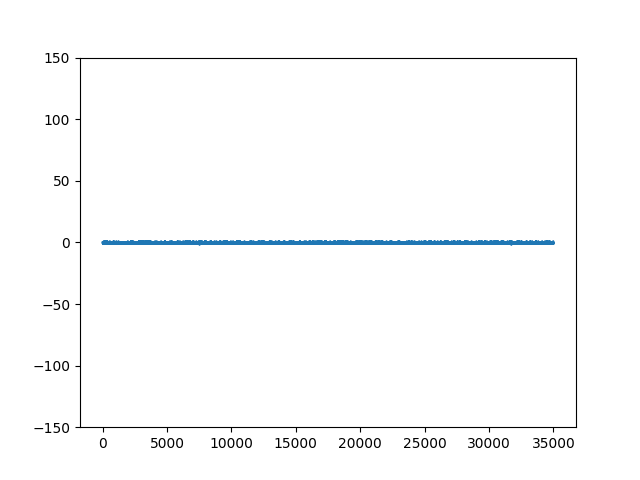

In [2]:
%matplotlib widget
plt.close('all')
data = scope.get_raw(channel=1)
print(data)
plt.plot(data)
plt.ylim(-150, 150)
plt.show()

In [4]:
print(scope.get_offset(1))
print(scope.get_sample_rate())
print(scope.get_volts_div(1))
print(scope.get_time_div())
print(scope.get_number_of_samples(1))



0.0
500000000.0
0.5
0.0002
1400000.0


In [6]:


volts = scope.get_voltage(1)
times = scope.get_time(1)
vdiv = scope.get_volts_div(1)
# tdiv = scope.get_time_div()

t_ticks = []
t_ticks[0] = -7*tdiv
for i in range(1,14):
    t_ticks.append(t_ticks[i-1] + tdiv)

v_ticks = []
v_ticks[0] = -4*vdiv
for i in range(1,8):
    v_ticks.append(v_ticks[i-1] + vdiv)

print(times)

plt.figure()          # ← NEW figure & axes
plt.plot(times, volts)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.ylim(-5*vdiv, 5*vdiv)
plt.xlim(min(times), max(times))   # optional: zoom exactly to your data
plt.xticks(t_ticks)
plt.yticks(v_ticks)
plt.grid()
plt.title('Voltage vs Time')
plt.show()

TypeError: SDS1104XE.get_time_div() takes 1 positional argument but 2 were given